In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.size'] = 12

In [8]:
class Gridworld:
    def __init__(self, size=8, goals=[7], penalty=0):
        self.size = size
        self.goals = goals
        self.penalty = penalty

        self.states = range(size)
        self.actions = [-1, 1]
        self.policy = {}
        self.value = {}

        for s in self.states:
            self.value[s] = 0

    def move(self, s, a):
        if s in self.goals:
            return 0, s
        
        s_new = s + a

        if s_new not in self.states:
            return self.penalty, s

        if s_new in self.goals:
            return 1, s_new

        return self.penalty, s_new

In [9]:
def show_values(world, subplot=None, title='Values'):
    if not subplot:
        fig = plt.figure(figsize=(world.size*0.8, 1.7))
        subplot = fig.add_subplot(1,1,1)

    result = np.zeros([1, world.size])
    for s in world.states:
        result[0][s] = world.value[s]
    sns.heatmap(result, square=True, cbar=False, yticklabels=[], annot=True, fmt='3.1f', cmap='coolwarm', ax=subplot).set_title(title)


In [10]:
def policy_eval(world, gamma=1.0, trace=False):
    if trace:
        fig = plt.figure(figsize=(world.size*0.8, len(world.states)*1.7))

    for s in world.states:
        v_new = 0
        for a in world.actions:
            r, s_new = world.move(s,a)
            v_new += world.policy[(s,a)] * (r + gamma * world.value[s_new])
        world.value[s] = v_new

        if trace: 
            subplot = fig.add_subplot(world.size, 1, s+1)
            show_values(world, subplot, title='Update on s={}'.format(s))

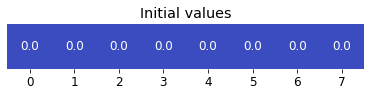

In [11]:
world = Gridworld(size=8, goals=[7])
for s in world.states:
    world.policy[(s, 1)] = 1
    world.policy[(s, -1)] = 0

show_values(world, title="Initial values")

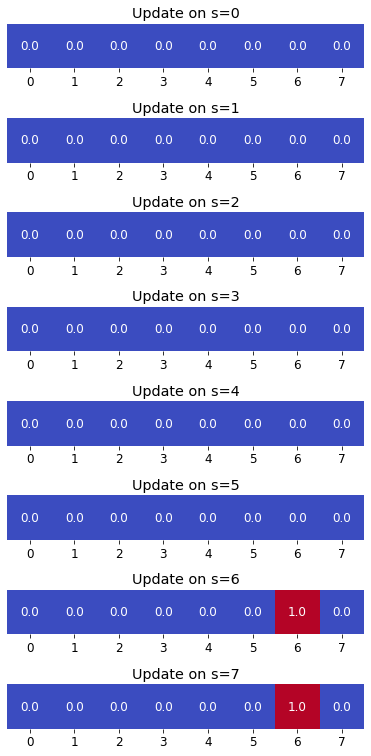

In [12]:
policy_eval(world, trace=True)

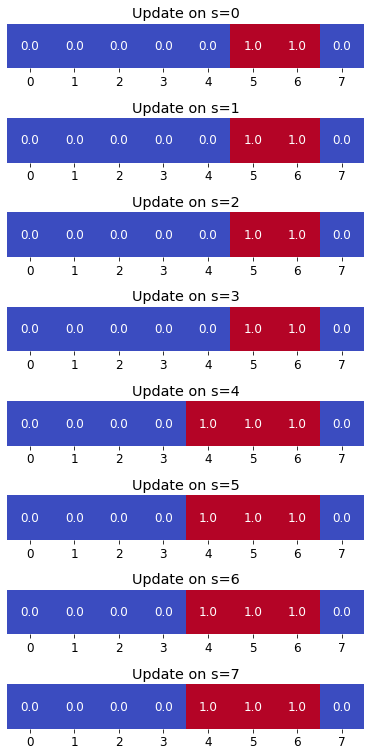

In [14]:
policy_eval(world, trace=True)

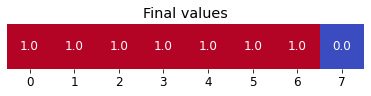

In [15]:
for _ in range(5):
    policy_eval(world)

show_values(world, title='Final values')

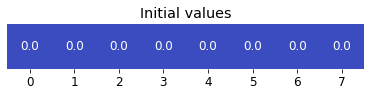

In [16]:
world = Gridworld(size=8, goals=[7])
for s in world.states:
    world.policy[(s, -1)] = 1/2
    world.policy[(s, 1)] = 1/2

show_values(world, title='Initial values')

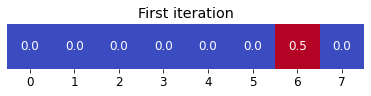

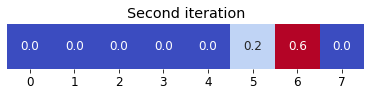

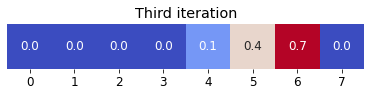

In [17]:
policy_eval(world)
show_values(world, title='First iteration')

policy_eval(world)
show_values(world, title='Second iteration')

policy_eval(world)
show_values(world, title='Third iteration')


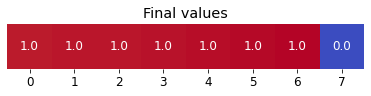

In [18]:
for _ in range(100):
    policy_eval(world)

show_values(world, title='Final values')

In [ ]:
world = Gridworld(size=8, goals=[7], penalty=-1)
for s in world.states:
    world.policy[(s, 1)] = 1
    world.policy[(s, -1)] = 0

show_values(world, title="Initial values")